In [1]:
!pip install tensorflow matplotlib


In [4]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout

In [5]:
num_words = 10000  # vocabulary size
maxlen = 200       # sequence length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print("Training samples:", len(x_train))
print("Test samples:", len(x_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000


In [6]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [7]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))


In [9]:
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.6516 - loss: 0.5970 - val_accuracy: 0.8446 - val_loss: 0.3705
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.8642 - loss: 0.3355 - val_accuracy: 0.8242 - val_loss: 0.3949
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.8884 - loss: 0.2835 - val_accuracy: 0.8348 - val_loss: 0.3832
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9133 - loss: 0.2352 - val_accuracy: 0.8400 - val_loss: 0.3949
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9203 - loss: 0.2100 - val_accuracy: 0.8480 - val_loss: 0.3820


In [12]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(acc*100))

Test Accuracy: 85.16%


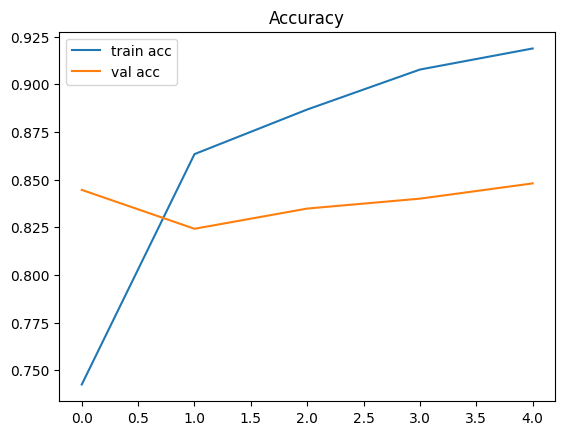

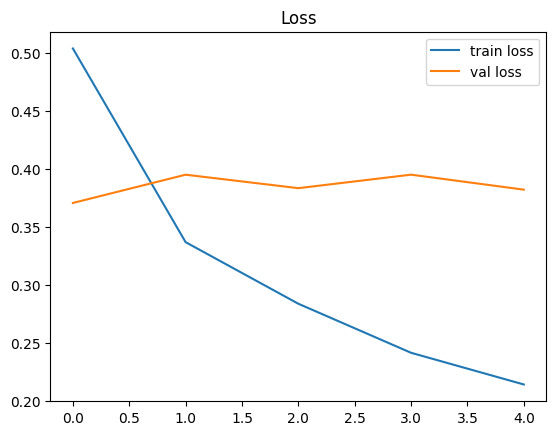

In [13]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

In [14]:
sample = x_test[0].reshape(1, -1)
pred = model.predict(sample)[0][0]
print("Predicted Sentiment:", "Positive" if pred>0.5 else "Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
Predicted Sentiment: Positive
